# Homoscedasity and Heteroscedasity - White Test and Breusch-Pagan Test
In the most simplest terms Homoscedasity means "equal scatter", and Heteroscedasity means "unequal scatter".
In more formal terms, Heteroscedasity means "a systeamatic change in the spread of the residuals over the range of measured values."
A lot of statistical methods assume homoscedasity, for example, one of the assumptions of Linear Regression is Homoscedasity of residuals. That is the residuals cannot be correlated with the explanatory variable. 

We will now illustrate it by creating two datasets, one that satisfies the assumption of homoscedasity and the other that does not.

In [78]:
import numpy
x=[i for i in range(50)];
y1=[];
for i in range(len(x)):
    y1.append(2*x[i]+3);
    y1[i]=y1[i]+numpy.random.normal(0,1,1);
    y1[i]=y1[i][0] #The statement creates a numpy ndarray
    
y2=[];
for i in range(len(x)):
    y2.append(2*x[i]+3);
    y2[i]=y2[i]+numpy.random.normal(x[i],x[i],1);
    y2[i]=y2[i][0]

In [79]:
import pandas
y1_df=pandas.DataFrame(list(zip(x,y1)),columns=['x','y'])
y2_df=pandas.DataFrame(list(zip(x,y2)),columns=['x','y'])

In [80]:
from statsmodels.formula.api import ols

In [81]:
y1_model = ols(formula='y~x', data=y1_df).fit()
y2_model = ols(formula='y~x', data=y2_df).fit()

In [82]:
print('y1_model parameters \n', y1_model.params)
print('y2_model parameters \n', y2_model.params)

y1_model parameters 
 Intercept    2.852776
x            1.997071
dtype: float64
y2_model parameters 
 Intercept    1.763652
x            3.022137
dtype: float64


Text(0.5, 1.0, 'y1 Linear Regression Plot')

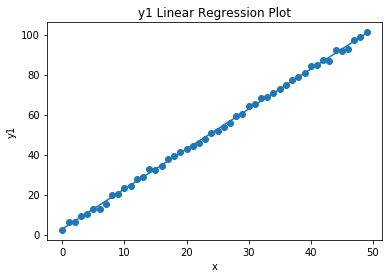

In [83]:
import matplotlib.pyplot as plt
plt.scatter(x, y1)
plt.plot(x, [ (float(y1_model.params.Intercept)+y1_model.params.x*i) for i in x])
plt.xlabel('x')
plt.ylabel('y1')
plt.title('y1 Linear Regression Plot')

Text(0.5, 1.0, 'y2 Linear Regression Plot')

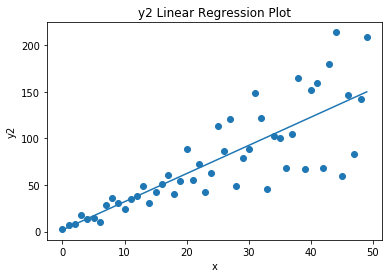

In [84]:
plt.scatter(x, y2)
plt.plot(x, [ (float(y2_model.params.Intercept)+y2_model.params.x*i) for i in x])
plt.xlabel('x')
plt.ylabel('y2')
plt.title('y2 Linear Regression Plot')

Now we plot the residuals against the x values

Text(0.5, 1.0, 'y1 Residuals Plot')

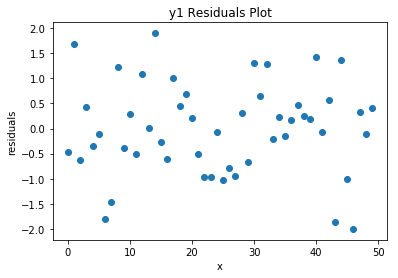

In [86]:
plt.scatter(x, [ y1[i]- [(float(y1_model.params.Intercept)+y1_model.params.x*i) for i in x][i] for i in range(len(x))])
plt.xlabel('x')
plt.ylabel('residuals')
plt.title('y1 Residuals Plot')

Text(0.5, 1.0, 'y2 Residuals Plot')

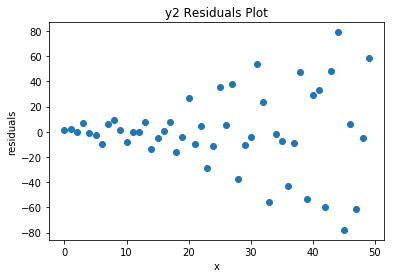

In [85]:
plt.scatter(x, [ y2[i]- [(float(y2_model.params.Intercept)+y2_model.params.x*i) for i in x][i] for i in range(len(x))])
plt.xlabel('x')
plt.ylabel('residuals')
plt.title('y2 Residuals Plot')

It is evident that for y1, there homscedasity and for y2 there is heteroscedasity. We further conduct statistical tests to confirm this.

## White Test
White’s test is used to test for heteroscedastic (“differently dispersed”) errors in regression analysis. It is a special case of the (simpler) Breusch-Pagan test.
The null hypothesis for White’s test is that the variances for the errors are equal. In math terms, that’s:
$$H_0 = \sigma^2 _i = \sigma^2$$
The alternate hypothesis (the one you’re testing), is that the variances are not equal:
$$H_1 = \sigma^2 _i \neq \sigma^2$$

In cases where the White test statistic is statistically significant, heteroskedasticity may not necessarily be the cause; instead the problem could be a specification error. In other words, the White test can be a test of heteroskedasticity or specification error or both. If no cross product terms are introduced in the White test procedure, then this is a test of pure heteroskedasticity. If cross products are introduced in the model, then it is a test of both heteroskedasticity and specification bias.

In [98]:
from statsmodels.stats.diagnostic import het_white
white_test_y1 = het_white(y1_model.resid,  y1_model.model.exog)
white_test_y2 = het_white(y2_model.resid,  y2_model.model.exog)
labels = ['LM-Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('y1 results', dict(zip(labels, white_test_y1)))
print('y2 results', dict(zip(labels, white_test_y2)))

y1 results {'LM-Statistic': 1.5847535471471441, 'LM-Test p-value': 0.4527673898480009, 'F-Statistic': 0.7692144744987333, 'F-Test p-value': 0.469121514698011}
y2 results {'LM-Statistic': 21.9736842457001, 'LM-Test p-value': 1.6922911859970234e-05, 'F-Statistic': 18.424882681724842, 'F-Test p-value': 1.2359649285983461e-06}


We see that F-Statistic p-value of Model 2 White Test is <0.05 and we reject the Null Hypothesis of Homoscedasity to conclude it has heteroscedasity.

## Breusch-Pagan Test

Breusch-P test is used to test for heteroscedastic (“differently dispersed”) errors in regression analysis.

The test statistic for the Breusch-Pagan-Godfrey test is:
$$n * \mathbb{R}^2 \textrm{(with k degrees of freedom)}$$
where: $n$ = sample size, $R^2 =$ Coefficient of Determination of the regression of squared residuals from the original regression., and $k$ = number of independent variables.
The test statistic approximately follows a chi-square distribution.


The null hypothesis for Breusch-Pagan’s test is that the variances for the errors are equal. In math terms, that’s:
$$H_0 = \sigma^2 _i = \sigma^2$$
The alternate hypothesis (the one you’re testing), is that the variances are not equal:
$$H_1 = \sigma^2 _i \neq \sigma^2$$


In [109]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_y1 = het_breuschpagan(y1_model.resid, y1_model.model.exog)
bp_y2 = het_breuschpagan(y2_model.resid, y2_model.model.exog)

labels = ['LM-Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('y1 results', dict(zip(labels, bp_y1)))
print('y2 results', dict(zip(labels, bp_y2)))

y1 results {'LM-Statistic': 0.00013699997343241677, 'LM-Test p-value': 0.9906612147939752, 'F-Statistic': 0.0001315203348623905, 'F-Test p-value': 0.9908974094141333}
y2 results {'LM-Statistic': 19.51100221621669, 'LM-Test p-value': 1.000219237775036e-05, 'F-Statistic': 30.71692001881833, 'F-Test p-value': 1.2441608310460303e-06}


We see that F-Statistic p-value of Model 2 White Test is <0.05 and we reject the Null Hypothesis of Homoscedasity to conclude it has heteroscedasity.

### Some differences between the White Test and Breusch-Pagan Test:

1. Breusch-Pagan assumes heteroskedasticity is linear, which makes it inapplicable in some cases
2. Breusch-Pagan tests for the presence of heteroskedasticity, while White tests for bias due to heteroskedasticity. 
3. The Breusch-Pagan test can be applied to individual variables.
4. The Breusch-Pagan test has more power.
5. The Breusch-Pagan test is much more computationally efficient.